# 1) Problem Statement:
# Predicting Turbine Energy Yield (TEY) using ambient variables as features

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn
import keras
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
import tensorflow as tf

ModuleNotFoundError: No module named 'keras.wrappers'

In [ ]:
#Model Validation
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/Neural Networks/gas_turbines.csv')
data.head()

In [ ]:
data.dtypes

# Data Analysis and visualisation

In [ ]:
data.columns

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(data['AT'],ax=axes[0,0],color='indigo')
sns.distplot(data['AP'],ax=axes[0,1],color='orange')
sns.distplot(data['AH'],ax=axes[1,0],color='indigo')
sns.distplot(data['AFDP'],ax=axes[1,1],color='orange')
sns.distplot(data['GTEP'],ax=axes[2,0],color='indigo')
sns.distplot(data['TIT'],ax=axes[2,1],color='orange')
sns.distplot(data['TAT'],ax=axes[3,0],color='indigo')
sns.distplot(data['CDP'],ax=axes[3,1],color='orange')
sns.distplot(data['CO'],ax=axes[4,0],color='indigo')
sns.distplot(data['NOX'],ax=axes[4,1],color='orange')


Inferences drawn:

1:Left Skewness : AH | TIT | TAT

2:Right Skewness : AFDP | CO

3:AT | NOX seems to have normally distribution


<AxesSubplot:xlabel='TEY', ylabel='Density'>

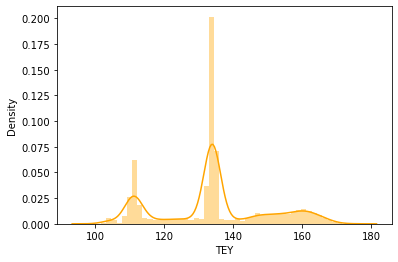

In [14]:
sns.distplot(data['TEY'],color='orange')

<AxesSubplot:xlabel='NOX', ylabel='TEY'>

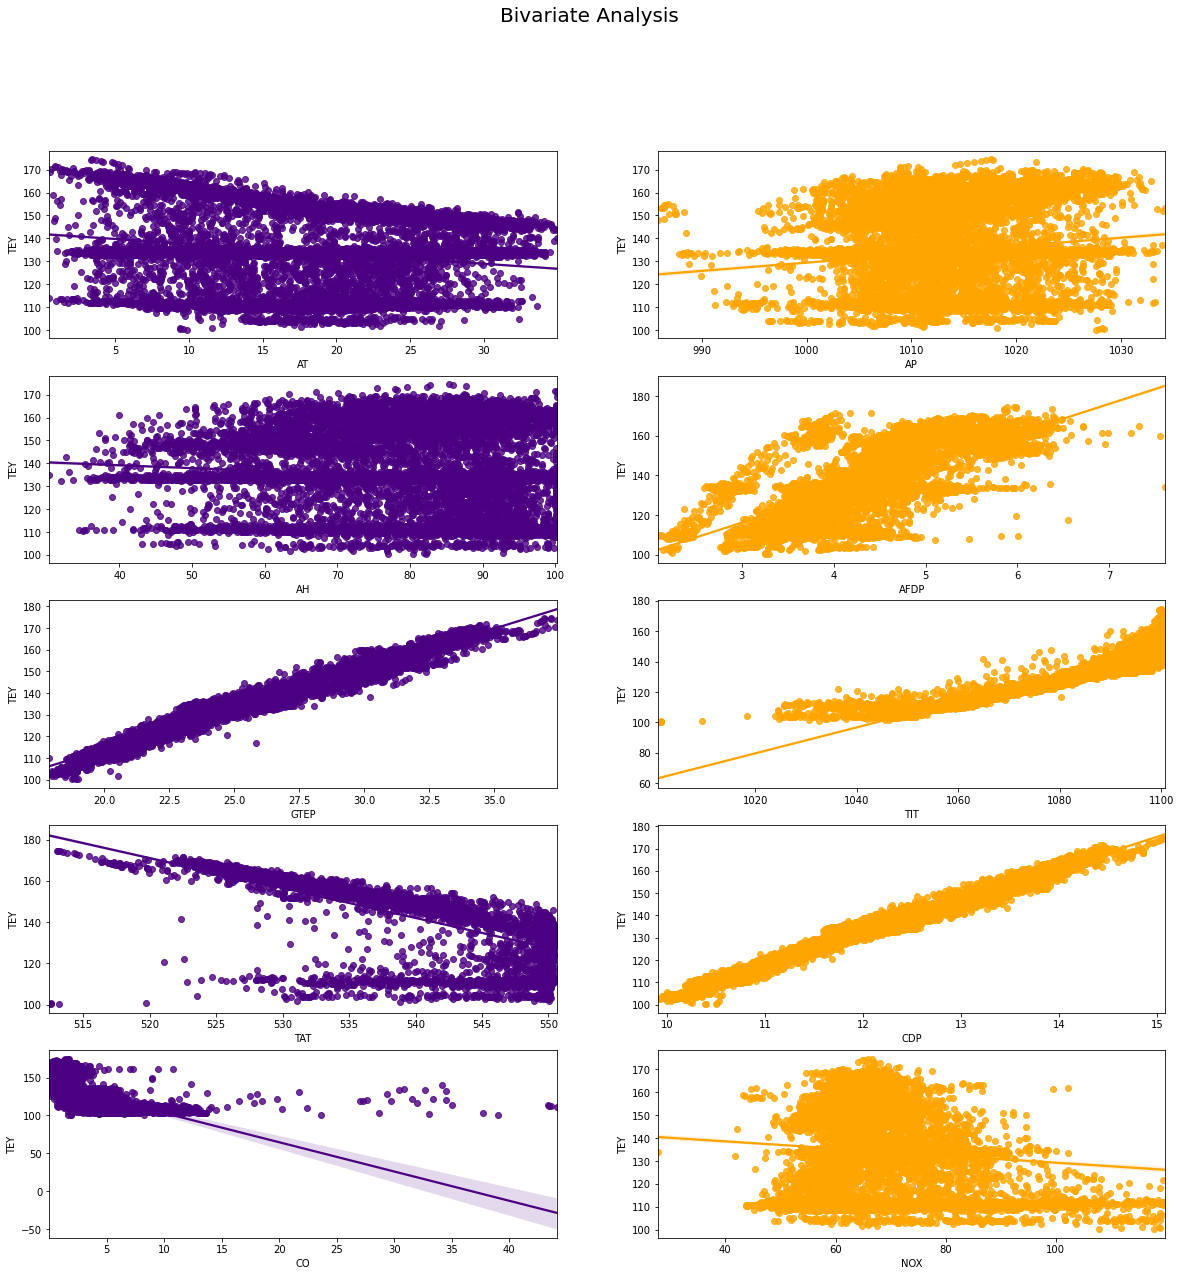

In [15]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Bivariate Analysis',fontsize=20)
sns.regplot(x="AT",y="TEY",data=data,ax=axes[0,0],color='indigo')
sns.regplot(x="AP",y="TEY",data=data,ax=axes[0,1],color='orange')
sns.regplot(x="AH",y="TEY",data=data,ax=axes[1,0],color='indigo')
sns.regplot(x="AFDP",y="TEY",data=data,ax=axes[1,1],color='orange')
sns.regplot(x="GTEP",y="TEY",data=data,ax=axes[2,0],color='indigo')
sns.regplot(x="TIT",y="TEY",data=data,ax=axes[2,1],color='orange')
sns.regplot(x="TAT",y="TEY",data=data,ax=axes[3,0],color='indigo')
sns.regplot(x="CDP",y="TEY",data=data,ax=axes[3,1],color='orange')
sns.regplot(x="CO",y="TEY",data=data,ax=axes[4,0],color='indigo')
sns.regplot(x="NOX",y="TEY",data=data,ax=axes[4,1],color='orange')

# Inferences drawn:

1:GTEP | CDP have a perfect Linear Increasing Relation with TEY

2:TIT | AFDP has slight Linear Increasing Relation with TEY

3:TAT | CO has slight Linear Decreasing Relation with TEY

4:AT | AP | AH | NOX have scattered points all around very less relation

<AxesSubplot:>

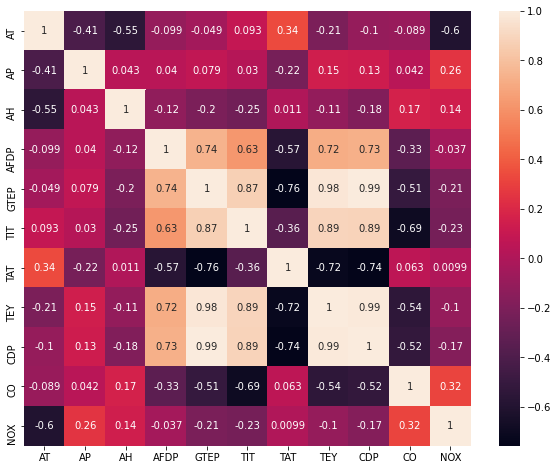

In [16]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)

In [17]:
# Defining Independent and Dependent Variables
X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

# K-Fold Cross Validation

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)


In [19]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [20]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.12 (0.10) MSE


In [21]:
estimator.fit(X, y)
prediction = estimator.predict(X)

In [22]:
prediction


array([-0.9378244 , -0.9440967 , -0.9451894 , ..., -0.5293835 ,
       -0.67582446, -0.8478818 ], dtype=float32)

# Applying inverse transform

In [23]:
a=scaler.inverse_transform(prediction)

In [24]:
b=scaler.inverse_transform(y)

# Calculating error of model

In [25]:
mean_squared_error(b,a)


21.269208814900875

# Split the data to test and train


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [27]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [28]:
prediction

array([-0.4195593 , -1.0084783 ,  0.10365497, ..., -1.1379801 ,
        0.69231784,  0.41425934], dtype=float32)

# Applying inverse transform

In [29]:
c=scaler.inverse_transform(prediction)


In [30]:
d=scaler.inverse_transform(y_test)


In [31]:
mean_squared_error(d,c)

85.17811472899346

# 2) Problem Statement:
# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
# Import Libraries
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/Neural Networks/forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.shape

(517, 31)

In [8]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
df=data.copy()
df.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small


In [10]:
df=df.drop(columns=['month','day'],axis=1)
df.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small


In [11]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [12]:
df.size_category.value_counts()

size_category
small    378
large    139
Name: count, dtype: int64

In [13]:
df.area.value_counts()

area
0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: count, Length: 251, dtype: int64

In [14]:
df.rain.value_counts()

rain
0.0    509
0.2      2
0.8      2
1.0      1
6.4      1
0.4      1
1.4      1
Name: count, dtype: int64

In [15]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['size_category'] = label_encoder.fit_transform(df['size_category'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [17]:
X = df.drop('size_category',axis=1)
y = df['size_category']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [19]:
# Create model
model = Sequential()
model.add(Dense(42, input_shape=(28,), activation = 'relu'))
model.add(Dense(28, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Fit the model
history = model.fit(X_train,y_train, validation_split=0.33, epochs=180, batch_size=10)

Epoch 1/180
28/28 [==============================] - 0s 5ms/step - loss: 0.0612 - accuracy: 0.9819 - val_loss: 0.0982 - val_accuracy: 0.9708
Epoch 2/180
28/28 [==============================] - 0s 4ms/step - loss: 0.1073 - accuracy: 0.9674 - val_loss: 0.0829 - val_accuracy: 0.9781
Epoch 3/180
28/28 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.9855 - val_loss: 0.0751 - val_accuracy: 0.9854
Epoch 4/180
28/28 [==============================] - 0s 4ms/step - loss: 0.0597 - accuracy: 0.9855 - val_loss: 0.0831 - val_accuracy: 0.9708
Epoch 5/180
28/28 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9928 - val_loss: 0.1791 - val_accuracy: 0.9489
Epoch 6/180
28/28 [==============================] - 0s 4ms/step - loss: 0.0210 - accuracy: 0.9891 - val_loss: 0.1683 - val_accuracy: 0.9562
Epoch 7/180
28/28 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9891 - val_loss: 0.0909 - val_accuracy: 0.9781
Epoch 8/180
2

In [28]:
# Evaluate the model
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9879
accuracy: 98.79%


In [29]:
# Evaluate the model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9615
accuracy: 96.15%


In [30]:
# Visualize training his, List all data in his
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

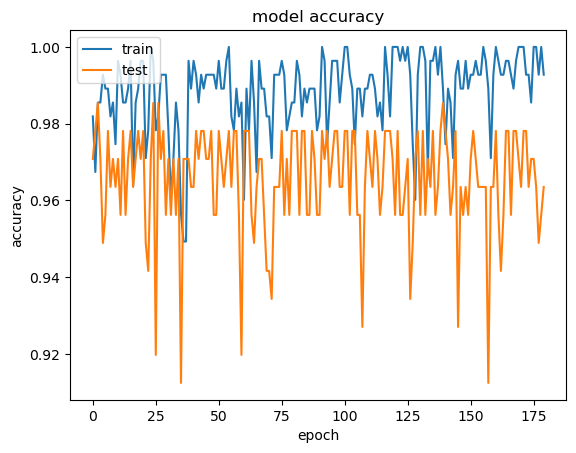

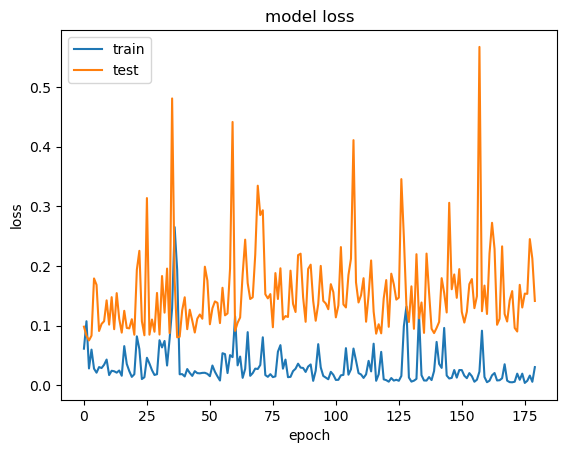

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conclusion:
We have predicted the result with 98% accuracy, epoch = 180.